# Validating Selfplay Data

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from aegomoku.gomoku_board import GomokuBoard
from aegomoku.game_data import read_training_data
from aegomoku.utils import analyse_example

import os

from setup_prod import DATA_PATH


# The Data

In [9]:
PHASE = '0'
HOST = os.uname()[1]
SELFPLAY_DATA=DATA_PATH / 'selfplay2' / PHASE / HOST
print(os.listdir(SELFPLAY_DATA))

['00000.pickle']


In [10]:
a_pickle = SELFPLAY_DATA / '00000.pickle'
filename = a_pickle.resolve().as_posix()
filename

'/home/wgiersche/workspace/Project-Ellie/DATA/selfplay2/0/tensorbook/00000.pickle'

In [11]:
examples, games = read_training_data(filename)
len(games), len(examples), len(examples[0]), examples[0][0].shape

(2, 928, 3, (21, 21, 3))

#### Game Info
Player name from `gameplay_params.yaml` and all moves

In [12]:
BOARD_SIZE = 19
board = GomokuBoard(BOARD_SIZE)
for game in games[:4]:
    print(f"{game[0]} begins with black")
    print([board.Stone(i) for i in game[1]])

None begins with black
[L9, K11, K8, K9, L8, J8, M11, J7, J9, L7, K7, M8, K6, M9, L10, L12, K10, M12, N12, M10, M6, L11, M13, J6, N9, K5, J5, L6, L5, N7, M7, O11, H7, N11, H8, O13, L13, G6, O12, H6, F6, G7, G5, F7, M14, K12, I14, N13, I12, I13, O14, E7, J4, N14, P12, J14, K15, G8, G9, E8, H5, E9, F8, E6, E5, E10]
None begins with black
[K9, L11, I10, J9, K10, K12, J11, I12, J10, L10, L12, K11, J13, I13, J12, J14, K15, H12, L14, H10, I15, M15, H11, M13, G11, F11, G12, F13, F12, G14, H15, J15, I14, G10, E12, L13, E13, E14, M14, G16, F15, N14, F14, D12, N13, D14, H14, G13, O12, L15, O13, E15, I16, G17, G15, F16, H18, C13]


In [15]:
ints = games[0][1]
print(ints)

[200, 163, 179, 199, 181, 143, 161, 141, 180, 182, 144, 162, 123, 122, 142, 104, 86, 140, 106, 178, 84, 88, 159, 126, 158, 157, 139, 119, 138, 101, 83, 85, 103, 177, 137, 125, 118, 99, 107, 63, 81, 108, 100, 136, 127, 98, 102, 120, 147, 87, 128, 80, 65, 44, 82, 62, 26, 116]


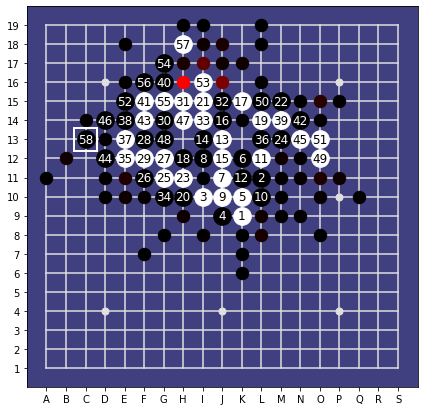

In [16]:
from aegomoku.utils import analyse_board
from aegomoku.policies.topological_value import TopologicalValuePolicy

policy = TopologicalValuePolicy(board_size=BOARD_SIZE)

analyse_board(19, ints, adviser_or_array=policy, disp_width=7)

In [9]:
stones = [board.Stone(i) for i in ints]
stones = "".join([str(stone) for stone in stones])
stones

'K11H10I8J9I9I10J10H8H11I11M13L12J12I13I12G10H12F10E10G12I7J13H13G14H15H14G13F14I14E14D14F13D15F12F11F15F16G16D13D12D17D16G17E11G9H17E15C13H18'

# Study the position on an interactive board

In [15]:
from cmclient.api.basics import CompManConfig
from cmclient.api.study import StudyHandler
from aegomoku.gomoku_game import ConstantBoardInitializer

config = CompManConfig(board_size=19)
initializer = ConstantBoardInitializer(stones)
ai = DATA_PATH / 'models'/'3_c2.model'
num_simulations = 200
StudyHandler(config, "../cmclient/gui/", initializer, ai, num_simu=num_simulations).handle()

pygame 2.1.2 (SDL 2.0.18, Python 3.10.6)
Hello from the pygame community. https://www.pygame.org/contribute.html


---

## Data Verification
Now we skim through a good chunk of training records to check whether it makes sense to the expected degree.

### Compare with the original policy's estimate
The tree search results in less, but more refined options

258
Next to play: BLACK
Value from BLACK's point of view: 0.19894528940487574
Next to play: BLACK
Value from BLACK's point of view: 0.10855838656425476


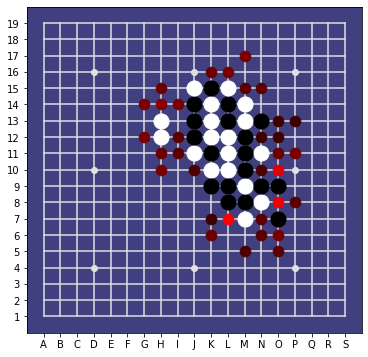

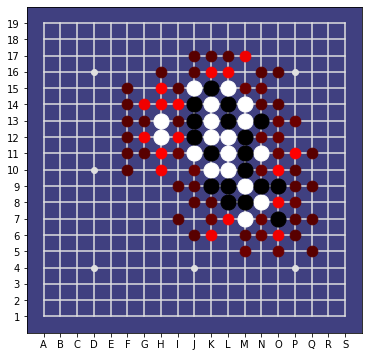

In [34]:
import random
from aegomoku.policies.topological_value import TopologicalValuePolicy

n = random.randint(0, len(examples))
#n = 4688
print(n)
example = examples[n]
analyse_example(example, policy_cutoff=1, disp_width=6)

from aegomoku.policies.heuristic_value_model import HeuristicValueModel
from aegomoku.policies.heuristic_advice import HeuristicPolicyParams, HeuristicAdviser, HeuristicValueParams

value_params = HeuristicValueParams(board_size=BOARD_SIZE)
value_model = HeuristicValueModel(value_params)
adviser = HeuristicAdviser(HeuristicPolicyParams(board_size=BOARD_SIZE), value_model)

#policy = TopologicalValuePolicy(kappa_s=6, kappa_d=5, board_size=BOARD_SIZE)
s, _, _ = example
p, v = adviser.evaluate(s)
analyse_example((s, p, v), policy_cutoff=50, disp_width=6)